--- Algorithm Comparison ---

BFS Algorithm:
Path Length: 12
Nodes Explored: 52

A* Algorithm:
Path Length: 12
Nodes Explored: 23
----------------------------


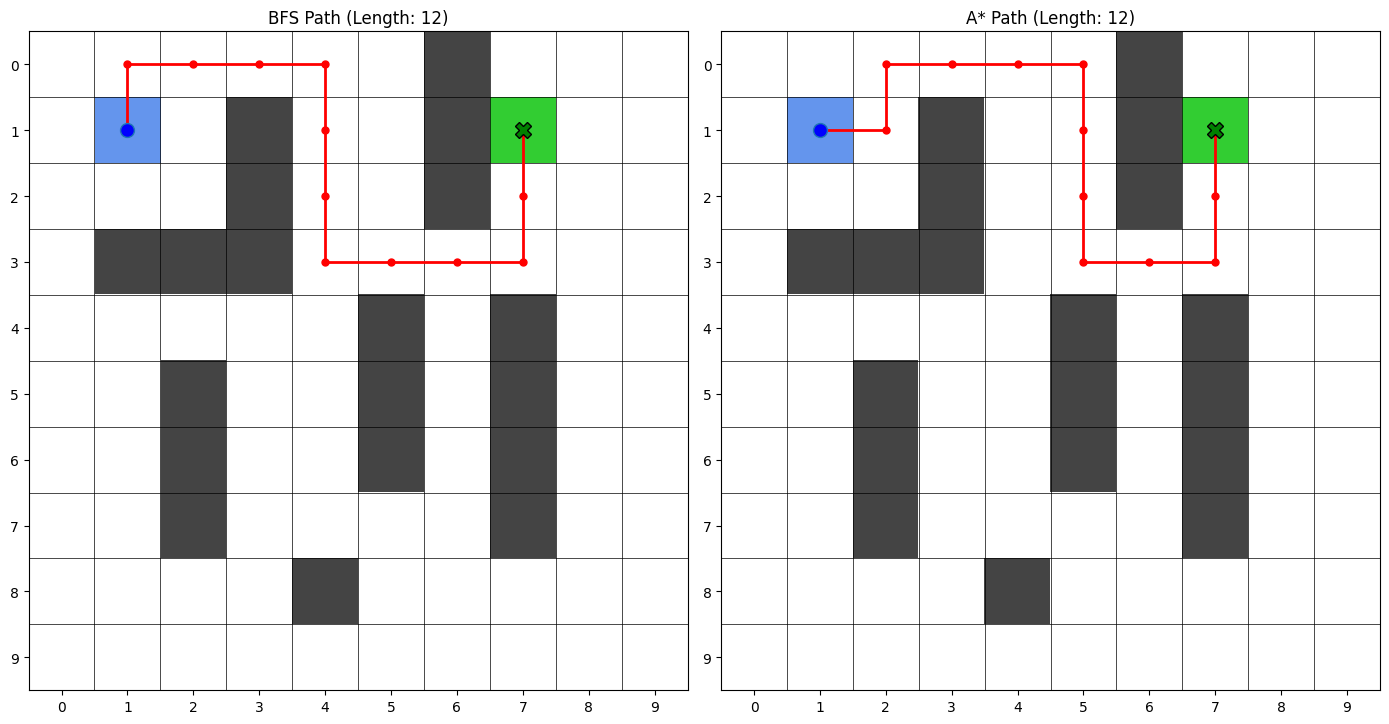

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import heapq
import matplotlib.colors

def solve_pathfinding_task():
    """
    This function contains all the code to solve Task 1, as requested
    in the software.md file.
    """

    # --- Part 1.1: Setup & The Field ---
    # 0=Empty, 1=Obstacle, 2=Robot, 3=Ball
    # Using the grid provided in the task description
    grid = [
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 2, 0, 1, 0, 0, 1, 3, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
    
    start_pos = (1, 1)
    goal_pos = (1, 7)
    
    # Grid dimensions
    ROWS, COLS = len(grid), len(grid[0])

    # --- Helper function to check validity ---
    def is_valid(r, c):
        # Check boundaries and if it's not an obstacle
        return (0 <= r < ROWS) and (0 <= c < COLS) and (grid[r][c] != 1)

    # --- Part 1.2: Algorithm Implementation (BFS) ---
    def bfs(grid, start, goal):
        q = deque([(start, [start])])  # (current_pos, path_list)
        visited = {start}
        nodes_explored = 0

        while q:
            (r, c), path = q.popleft()
            nodes_explored += 1

            if (r, c) == goal:
                return path, nodes_explored  # Found goal

            # Check 4-directional movement (Up, Down, Left, Right)
            for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nr, nc = r + dr, c + dc
                
                if is_valid(nr, nc) and (nr, nc) not in visited:
                    visited.add((nr, nc))
                    new_path = path + [(nr, nc)]
                    q.append(((nr, nc), new_path))
        
        return None, nodes_explored # No path found

    # --- Part 1.2: Algorithm Implementation (A*) ---
    
    # Heuristic function: Manhattan Distance
    def manhattan_distance(pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

    def astar(grid, start, goal):
        pq = [(0, 0, start, [start])]  # (f_score, g_score, current_pos, path)
        visited = {start} # Tracks nodes *added* to pq
        nodes_explored = 0 # Tracks nodes *popped* from pq
        
        # g_scores dictionary to store the cost from start
        g_scores = { (r,c): float('inf') for r in range(ROWS) for c in range(COLS) }
        g_scores[start] = 0

        while pq:
            f, g, current_pos, path = heapq.heappop(pq)
            nodes_explored += 1
            
            # If we pop a node with a higher g_score, it's an old path
            if g > g_scores[current_pos]:
                continue

            if current_pos == goal:
                return path, nodes_explored # Found goal

            # Check 4-directional movement
            for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nr, nc = current_pos[0] + dr, current_pos[1] + dc
                
                if is_valid(nr, nc):
                    new_g = g + 1 # Cost for each step is 1
                    
                    if new_g < g_scores[(nr, nc)]:
                        g_scores[(nr, nc)] = new_g
                        h = manhattan_distance((nr, nc), goal)
                        f = new_g + h
                        
                        heapq.heappush(pq, (f, new_g, (nr, nc), path + [(nr, nc)]))
                        visited.add((nr, nc))
        
        # Return total nodes visited even if no path found
        return None, len(visited)

    # --- Part 2: Visualization & Evaluation ---

    def visualize_grid(ax, grid_data, path, title):
        # Define colors: 0=White, 1=Black, 2=Blue, 3=Green
        cmap = matplotlib.colors.ListedColormap(['#ffffff', '#444444', '#6495ED', '#32CD32'])
        bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
        norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

        ax.imshow(grid_data, cmap=cmap, norm=norm, interpolation='nearest', origin='upper')

        # Draw gridlines
        ax.set_xticks(np.arange(-.5, COLS, 1), minor=True)
        ax.set_yticks(np.arange(-.5, ROWS, 1), minor=True)
        ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)
        ax.tick_params(which='minor', size=0)
        ax.set_xticks(np.arange(0, COLS, 1))
        ax.set_yticks(np.arange(0, ROWS, 1))

        if path:
            # Extract x and y coordinates from path
            # Note: (row, col) maps to (y, x) in plotting
            y_coords, x_coords = zip(*path)
            ax.plot(x_coords, y_coords, marker='o', markersize=5, mfc='red', mec='red', linestyle='-', color='red', linewidth=2)
            
            # Mark start and end
            ax.plot(start_pos[1], start_pos[0], 'o', markersize=10, mfc='blue', label='Start')
            ax.plot(goal_pos[1], goal_pos[0], 'X', markersize=12, mfc='green', mec='black', label='Goal')

        ax.set_title(title)
        ax.set_aspect('equal')

    # --- Run Algorithms and Print Comparison ---
    
    bfs_path, bfs_nodes = bfs(grid, start_pos, goal_pos)
    astar_path, astar_nodes = astar(grid, start_pos, goal_pos)

    print("--- Algorithm Comparison ---")
    print("\nBFS Algorithm:")
    if bfs_path:
        print(f"Path Length: {len(bfs_path) - 1}")
    else:
        print("Path Length: Not Found")
    print(f"Nodes Explored: {bfs_nodes}")

    print("\nA* Algorithm:")
    if astar_path:
        print(f"Path Length: {len(astar_path) - 1}")
    else:
        print("Path Length: Not Found")
    print(f"Nodes Explored: {astar_nodes}")
    print("----------------------------")

    # --- Create Visualizations ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
    visualize_grid(ax1, grid, bfs_path, f'BFS Path (Length: {len(bfs_path) - 1})')
    visualize_grid(ax2, grid, astar_path, f'A* Path (Length: {len(astar_path) - 1})')
    
    plt.tight_layout()
    plt.show()

# --- Execute the task ---
solve_pathfinding_task()